In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import scipy.stats as scipy 
import os
from google.colab import drive
from google.colab import files
import glob
import matplotlib.pyplot as plt

path="/content/drive/My Drive/Datos_Brutos"

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df=pd.DataFrame()
s=0
l=[]
for i in glob.glob(path+"/DataFrames/*.csv"):
    df1=pd.read_csv(i)
    l.append(df1)
    df=pd.concat([df,df1],axis=0)
    s+=df1.shape[0]

df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)

duplicados=df.loc[df.duplicated(subset="Date"),:]
df.drop_duplicates(subset="Date",inplace=True)

to_drop=['Bar Trend', 'Next Record',
       'Inside Temperature', 'Inside Humidity',
       '10 Min Avg Wind Speed', 'Extra Temperatures', 'Soil Temperatures', 'Leaf Temperatures',
       'Extra Humidties', 'Storm Rain', 'Start Date of current Storm',
       'Month Rain', 'Year Rain', 'Day ET', 'Month ET', 'Year ET',
       'Soil Moistures', 'Leaf Wetnesses', 'Inside Alarms', 'Rain Alarms',
       'Outside Alarms', 'Extra Temp/Hum Alarms', 'Soil & Leaf Alarms',
       'Transmitter Battery Status', 'Console Battery Voltage',
       'Forecast Icons', 'Forecast Rule number', 'Time of Sunrise',
       'Time of Sunset', '<LF> = 0x0A', '<CR> = 0x0D', 'CRC']

dfori=pd.read_csv(path+"/DatosEstacion2021-11-06.csv")


In [ ]:
df["Date"]=pd.to_datetime(df["Date"]) #98867
dft=pd.DataFrame()
dft["Date"]=pd.date_range(start="2019-01-7 00:00:00",end="2021-12-06 12:55:00", freq="5min") #306588


In [ ]:
df.set_index("Date",inplace=True)
dft.set_index("Date",inplace=True)

In [ ]:
dff=pd.merge(dft,df,how="outer",left_index=True,right_index=True)
dff.sort_index(ascending=True,inplace=True)
df.sort_index(ascending=True,inplace=True)

DATES DF

2019-01-7 00:00:00 to 2021-12-06 12:55:00

In [ ]:
def grafica(limite1,limite2,ejex,ejey,titulo,variable): #YYYY-MM-DD HH:MM:SS
    ax=plt.figure(figsize=(20,10))
    plt.plot(ejex,ejey,linewidth=1,color="Teal", linestyle=":")
    plt.grid(":", alpha=0.6) 
    plt.xlim(pd.to_datetime(limite1),pd.to_datetime(limite2))
    plt.title(titulo, size=16)
    plt.ylabel(variable, size=14, style="italic")
    plt.xlabel("Fecha", size=14,style="italic")
    plt.show()


In [ ]:
df.rename({"Out Temp":"Outside Temperature","Hum Out":"Outside Humidity",
           "Pt. Dew":"Dew Point","Speed Wind":"Wind Speed","Bar   ":
           "Barometer","Rain ":"Rain","Rad. Solar":"Solar Radiation",
           "Rate Rain":"Rain Rate", "Index UV ":"UV", "Temp In ":"Inside Temperature",
           "Hum In":"Inside Humidity","ET  ":"ET"},axis=1, inplace=True)
dff.rename({"Out Temp":"Outside Temperature","Hum Out":"Outside Humidity",
           "Pt. Dew":"Dew Point","Speed Wind":"Wind Speed","Bar   ":
           "Barometer","Rain ":"Rain","Rad. Solar":"Solar Radiation",
           "Rate Rain":"Rain Rate", "Index UV ":"UV", "Temp In ":"Inside Temperature",
           "Hum In":"Inside Humidity","ET  ":"ET"},axis=1, inplace=True)


In [ ]:
df['Rain Rate'] = df['Rain Rate']*0.2/10. #cm/h
dff['Rain Rate'] = dff['Rain Rate']*0.2/10.

In [ ]:
df=df[["Outside Temperature","Barometer","Rain","Rain Rate","UV","Solar Radiation","Wind Speed","Outside Humidity","Dir Wind.1"]]
dff=dff[["Outside Temperature","Barometer","Rain","Rain Rate","UV","Solar Radiation","Wind Speed","Outside Humidity","Dir Wind.1"]]
dfna=dff.fillna(-999)

CONTAR VALORES PERDIDOS


In [ ]:
dic={}
for i in dfna.columns:
    dic["VP "+i]=[dfna[dfna[i]==-999].shape[0], round((dfna[dfna[i]==-999].shape[0]/dff.shape[0])*100,3)]

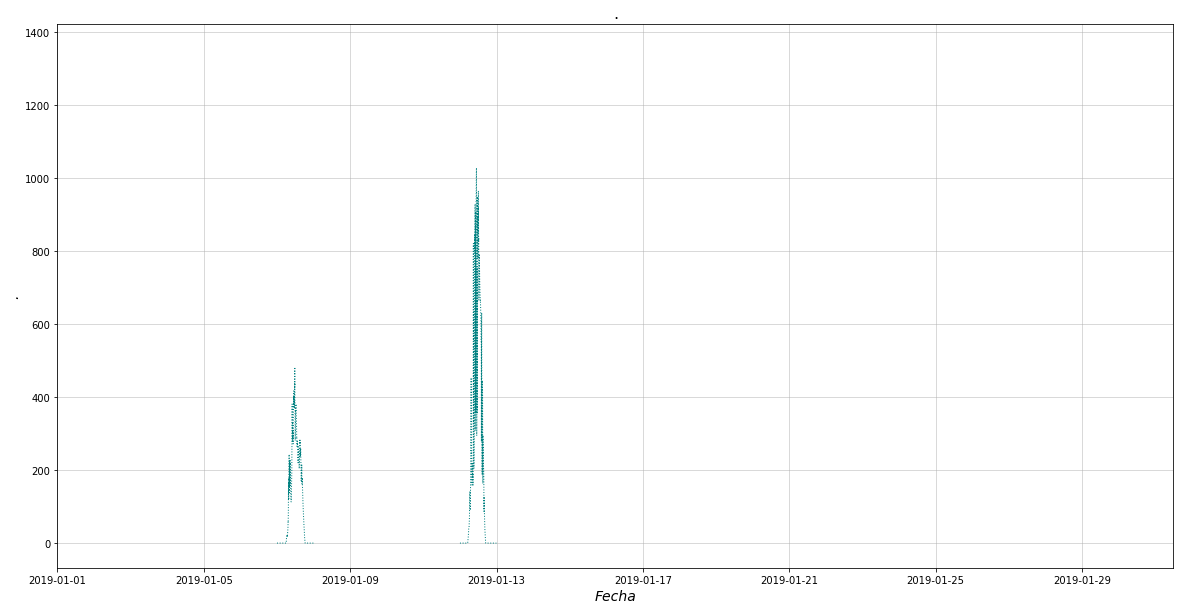

In [ ]:
grafica("2019-01-1 00:00:00","2019-01-31 11:59:00",dff.index,dff["Solar Radiation"],".", ".")